# Results of Edge Detection Benchmark and Speedup

### By: LESIYON RAYMOND

## Serial Experiment

I compiled the serial code on development node dev-intel14 in HPCC using the following commands:

```
module load libpng 
make 
make process
```

I ran the code 100 times on the test images. I used the averagetime.sh script written by the Professor Dirk. I used the command bash ./averagetime.sh "make test" to evaluate the run time of the program. The program took 1.115s to do image processing in the for images provided.

## Code Optimization

###Describe changes you made to the code to try and make it go faster### 

The different kind of optimization considered for this code is using level optimizers and rearranging the loops used to do Average Filter, Gradient Filter and Edge Thresholding. The results for optimizing using optimization levels are shown in the table below: 
 <table>
    <tr>
        <th>Without changing order of loops</th>
    </tr>
    <tr>
        <th>Optimizer</th><th>Time (s)</th>
    </tr>
    <tr>
        <td>O0</td><td>1.115</td>
    </tr>
    <tr>
        <td>O1</td><td>0.4628</td>
    </tr>
    <tr>
        <td>O2</td><td>0.4334</td>
    </tr>
    <tr>
        <td>O3</td><td>0.4251</td>
    </tr>
</table>

By using the optimization levels alone the execution time was reduces almost by 38%.

After using the optimization levels, using the fastest optimize which was -O3, the order of loops used to do filters was rearrange and timed if it changed the execution time. The time did not change a lot but was generally faster than code with no arrange loops. The data for rearrange loops in different optimizers is show in the table below; 

 <table>
    <tr>
        <th>Changing order of loops</th>
    </tr>
    <tr>
        <th>Optimizer</th><th>Time (s)</th>
    </tr>
    <tr>
        <td>O0</td><td>1.02404</td>
    </tr>
    <tr>
        <td>O1</td><td>0.4117</td>
    </tr>
    <tr>
        <td>O2</td><td>0.4239</td>
    </tr>
    <tr>
        <td>O3</td><td>0.3965</td>
    </tr>
</table>

Overally, the rerrange loops performed much better as compared to original loops in all optimization levels. The plot for the time is show below:

[1.128  0.4437 0.432  0.4288]


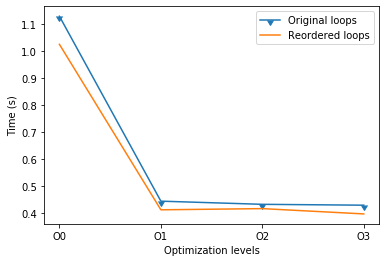

In [12]:
###Put your results here (maybe plot them if it seems appropriate)###
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
Optimizer = ["O0", "O1", "O2", "O3"]
time = np.array([[1.128, 1.02404], [0.4437, 0.4117], [0.432, 0.4161], [0.4288, 0.3965]])
print (time[:,0])
plt.plot(Optimizer,time[:,0],  marker=11, label="Original loops")
plt.plot(Optimizer,time[:,1], label="Reordered loops")
plt.xlabel("Optimization levels")
plt.ylabel("Time (s)")
plt.legend()

## OpenMP Speedup

To approach this question, I began from the average filter to the thresholding. I parallelize the code sequentially ensuring the output at each step was working right. My initially idea on parallelizing average filter was to use a #pragma omp for on the outer loops while the inner 3rd loops will have a pragma omp for reduction(:+count). While running with this parallelization, I was not able to compile the code. From then I changed the parallelization to #pragma omp for collapse(2). I used collapse(2) because the first outer loops can run in any particular order. I applied the same pragma for sobel filter, gradient filter and thresholding. The main reason being the loops are independent as mentioned before. With this alone, my code was able to execute at 0.37s compared to 0.3965s runtime of -O3 optimization level.

Also I had to ensure that I was using the -fopenmp correcting while compilling the code. Initially, I had not included the -fopenmp in the part of making *.o object files. When I included the flag, executed at 0.35s which was faster than previous time.

I started to change the scheduling of each parallel part. Before, I had left the default scheduling (static) for all the parallel code apart from thresholding part. I used dynamic scheduling for thresholding, reason being the presence of if statement which might result in different executing times for different threads. But suprising when I removed the dynamic scheduling for thresholding, the execution time reduced to around 0.31s. 

Then afterwards, I started changing the environment variables specifically the OMP_NUMS_THREADS. Setting it at value different values. At OMP_NUMS_THREADS == 10, the code executed much faster at time 0.19s. Using this as my last parallelization and setting of variables I was able to reduced the execution time from 1.024s to 0.195s which is 5 times faster than original code. 

I still think that other changes can be done to optimally parallelize the code. The plots for runtime for parallelized code, original and rearrange loops are shown in the cell below.

The table below summarizes different optimization ideas and their corresponding runtime.

 <table>
    <tr>
        <th>Improvement of the code performance</th>
    </tr>
    <tr>
        <th>Strategy </th><th>Time (s)</th>
    </tr>
    <tr>
        <td>pragma omp for collapse(2) & schedule(dynamic,4) for thresholding</td><td>0.37</td>
    </tr>
    <tr>
        <td>Including -fopenmp in all parts of the code compiling command</td><td>0.35</td>
    </tr>
    <tr>
        <td>Removing the schedule(dynamic, 4) for thresholding</td><td>0.31</td>
    </tr>
    <tr>
        <td>Setting OMP_NUM_THREADS = 10</td><td>0.19</td>
    </tr>
</table>

Text(0.5, 0, 'code')

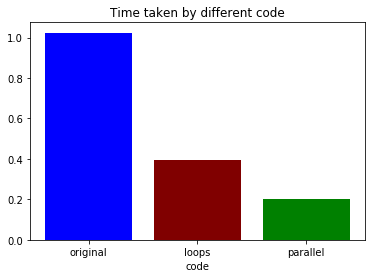

In [35]:
code = ["original", "loops","parallel"]
time = [1.024, 0.3965, 0.2]
plt.bar(code, time, color = ["blue", "maroon", "green"])
plt.title("Time taken by different code")
plt.xlabel("code")

## Concluding Discussion

This project was amazing, I was able to learn alot.It definitely had a lot of times where I opened more than 10 or 20 tabs googling or watching videos on how to parallelize and write makefile.

First of all, I was able to substantiate my understanding on openmp concepts like schedulling, for loops and collapse. Applying it to homework programatically, improved and bolstered my understanding on them. Secondly, I learnt a bit more on makefile and how to write them. There was a point where I was confused on how to make multiple executables using in makefile but I was eventually able to figure it out. Additionally, I got more time to play with github and pocket down more commands for doing version controls. 

What I still want to improve on? Makefile makefile makefile. Although I was able to figure out how to make multiple executables, I did not exactly find out how to run each executable by themselves using make test. I feel that are these nitty gritties, I need to be good at to be better Data Scientist. Additionally, there still a lot of learning to be done with regards to openmp. And one more, next time, I will be discipline to start my homework much early on time.

Overally, the homework was amazing and right level of challenge. 

----